In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

In [2]:
data=pd.read_csv('C:/Users/ADITYA/Downloads/forestfires.csv')

In [3]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
data.shape

(517, 31)

In [5]:
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [6]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
data.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [8]:
data.skew()

FFMC        -6.575606
DMC          0.547498
DC          -1.100445
ISI          2.536325
temp        -0.331172
RH           0.862904
wind         0.571001
rain        19.816344
area        12.846934
dayfri       1.816105
daymon       2.043956
daysat       1.835290
daysun       1.637920
daythu       2.375268
daytue       2.291255
daywed       2.594172
monthapr     7.401340
monthaug     0.603696
monthdec     7.401340
monthfeb     4.798308
monthjan    16.031038
monthjul     3.646828
monthjun     5.254127
monthmar     2.594172
monthmay    16.031038
monthnov    22.737634
monthoct     5.628522
monthsep     0.712255
dtype: float64

In [9]:
data.kurt()

FFMC         67.066041
DMC           0.204822
DC           -0.245244
ISI          21.458037
temp          0.136166
RH            0.438183
wind          0.054324
rain        421.295964
area        194.140721
dayfri        1.303265
daymon        2.186198
daysat        1.373589
daysun        0.685418
daythu        3.656027
daytue        3.262455
daywed        4.748083
monthapr     52.984784
monthaug     -1.641918
monthdec     52.984784
monthfeb     21.105386
monthjan    255.984443
monthjul     11.343218
monthjun     25.705276
monthmar      4.748083
monthmay    255.984443
monthnov    517.000000
monthoct     29.795509
monthsep     -1.498505
dtype: float64

In [10]:
data.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.137044,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.176301,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.105642,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.162322,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.329648,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,-0.047714,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,0.269702,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.009752,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,0.001010,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,-0.019140,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671


In [11]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [13]:
data[data.columns[0:11]].describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84


In [14]:
corr = data[data.columns[0:11]].corr()

<AxesSubplot:>

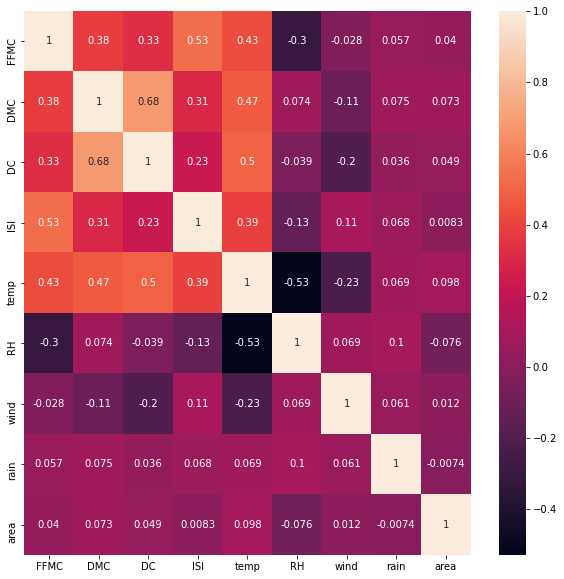

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)

C:\Users\ADITYA\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


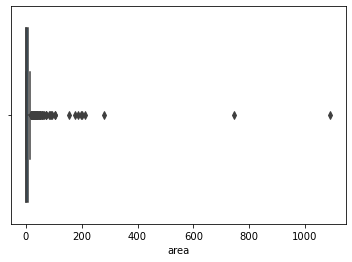

In [16]:
ax = sns.boxplot(data['area'])

In [17]:
plt.rcParams["figure.figsize"] = 9,5

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


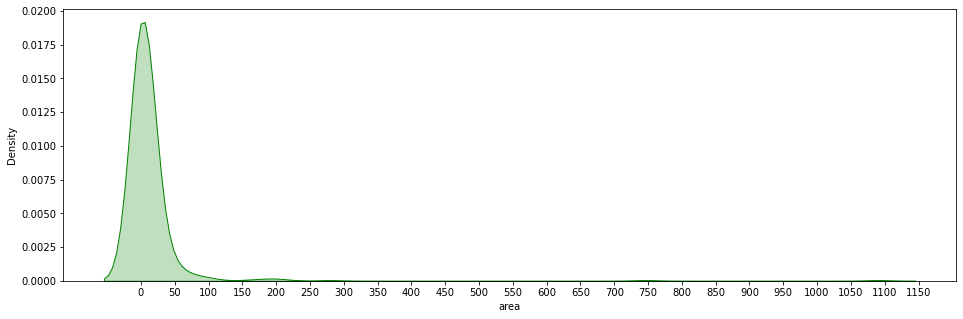

In [18]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(data['area'].skew()))
print("Kurtosis: {}".format(data['area'].kurtosis()))
ax = sns.kdeplot(data['area'],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

In [19]:
dfa = data[data.columns[0:10]]
month_colum = dfa.select_dtypes(include='object').columns.tolist()

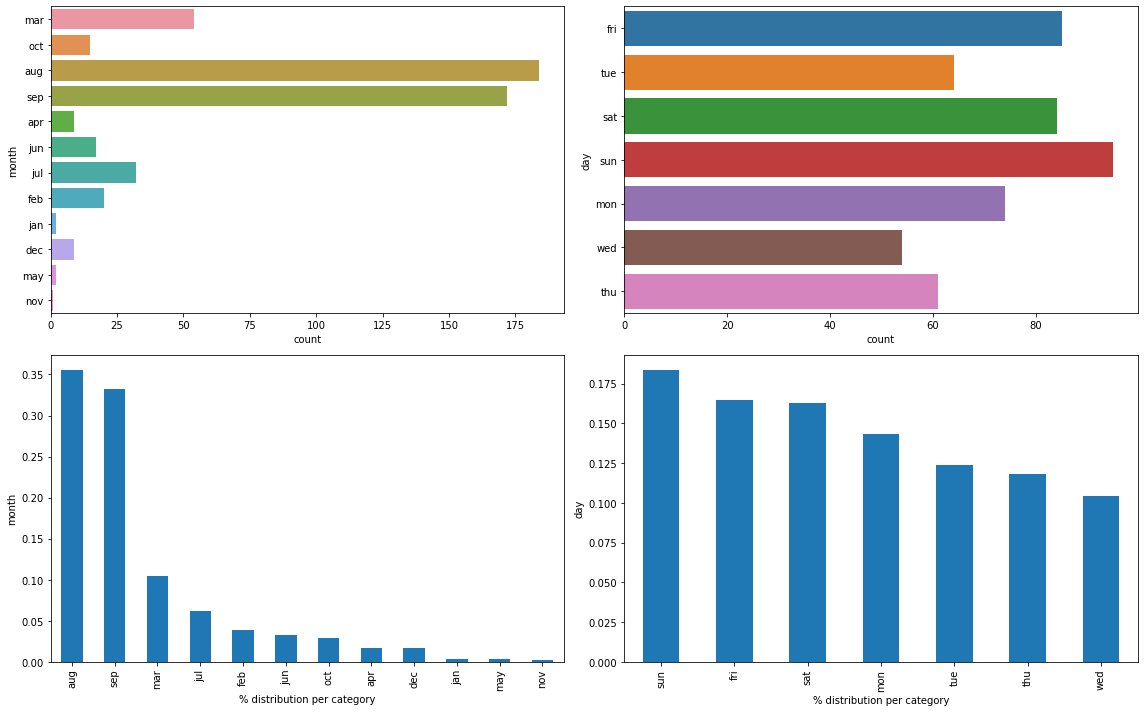

In [20]:
plt.figure(figsize=(16,10))
for i,col in enumerate(month_colum,1):
    plt.subplot(2,2,i)
    sns.countplot(data=dfa,y=col)
    plt.subplot(2,2,i+2)
    data[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

In [21]:
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()

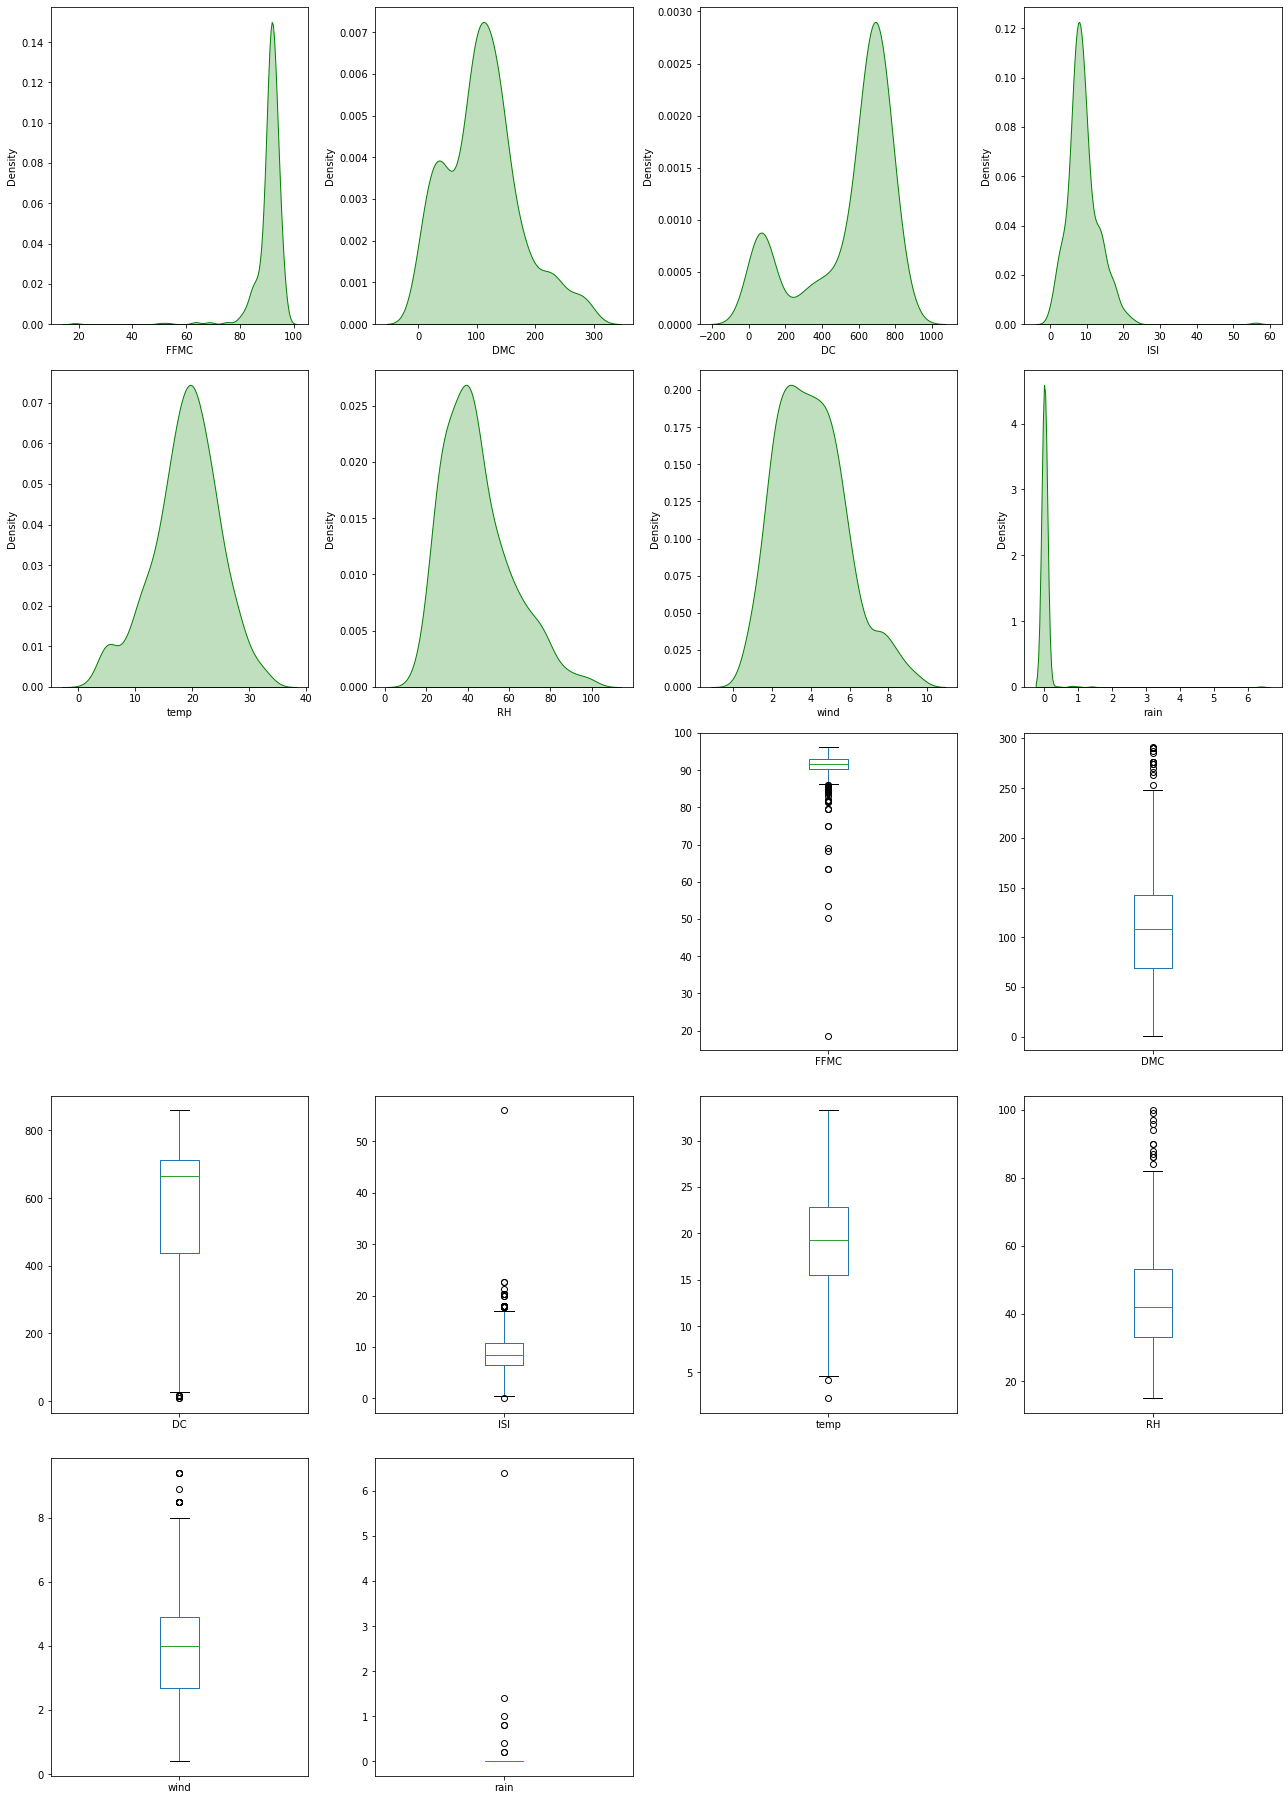

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
skewness,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344
kurtosis,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964


In [22]:

plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(data[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    data[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = data[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

SVM

In [23]:
X = data.iloc[:,2:30]
y = data.iloc[:,30]

In [24]:
mapping = {'small': 1, 'large': 2}

In [25]:
y = y.replace(mapping)

In [26]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.20, stratify = y)

linear

In [27]:
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_linear))

Accuracy: 0.9230769230769231


#poly

In [28]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)
pred_test_poly = model_poly.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_poly))

Accuracy: 0.7692307692307693


#sigmoid

In [29]:
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(x_train,y_train)
pred_test_sigmoid = model_sigmoid.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_test_sigmoid))

Accuracy: 0.6538461538461539


#linear gives best accuracy

In [32]:
ytt = y_train.to_numpy()

In [33]:
pca = PCA(n_components = 2)

In [34]:
x_train2 = pca.fit_transform(x_train)

In [ ]:
plot_decision_regions(x_train2,ytt, clf=model_linear)
plt.show()